
# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

A [US](https://www.scisolutions.com/uploads/news/Missed-Appts-Cost-HMT-Article-042617.pdf) study found that up to 30% of patients miss their appointments, and $150 billion is lost every year because of them.
Identifying potential no-shows can help healthcare institutions pursue targeted interventions  to reduce no-shows and financial loss.
This dataset collects information from 110,527 medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 14 associated characteristics about the patient are included in each row.
The [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments#) dataset comprised records from public healthcare institutions in a Brazilian city.

Data Dictionary:
01. PatientId:
Identification of a patient .
02. AppointmentID:
Identification of each appointment
03. Gender:
Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
04. AppointmentDay:
The day of the actuall appointment, when they have to visit the doctor.
05. ScheduledDay:
The day someone called or registered the appointment, this is before appointment of course.
06. Age:
How old is the patient.
07. Neighbourhood:
Where the appointment takes place.
08. Scholarship:
True of False 
09. Hipertension:
True or False
10. Diabetes:
True or False.
11. Alcoholism:
True or False
12. Handcap:
0:4
13. SMS_received:
1 or more messages sent to the patient.
14. No-show:
True or False.


> ####  Question 1: (Who care most about his health and is there relation between health awareness  and attendance ...? )
> ####  Question 2: (Is  appoitment time affect and is their is relation between it and schedule time  ...? )

In [1]:

#importing libiraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
% matplotlib inline 


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# we would load data directly from link 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv'
df = pd.read_csv(url)

> #### sample of data 

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.isnull().all()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [5]:
# caculate total rows with any missing data 
(df.isnull().sum(axis=1)>0 ).astype(np.int64).sum()

0

>That seems good as we  haven't any missing data or  null in the data as each columns has no nullvalues . 

In [6]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

## checking duplicate 
>that also seem's good as we haven't any duplicated data . 

In [7]:
sum(df.duplicated())

0

## AppointmentDay problem 
as we can see in the next few code that AppointmentDay columns has the same time which is 00:00:00Z rather than ScheduledDay,
but i don't think that would case problem 

In [8]:
# splitiing time of appointment 
df_ap = df['AppointmentDay'].apply(lambda x :x.split("T")[1])

In [9]:
(df_ap=="00:00:00Z").all()

True

### logical inconsistencies 
> scheduled dates were after appointment dates

In [10]:
len (df[df['AppointmentDay'] < df['ScheduledDay']])

38568

> it's clear that this is a problem and that isn't logicla consistent so we would remove it .

## Incorrect Datatype
we can see that:
1. paientid need to be in int type.
2. ScheduledDay to be in time type . 
3. Also AppointmentDay to be in time type .

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## Let's see some statistics about data 

In [12]:
# our columns start from 2 to avoid id columns 
df.iloc[: , 2:].describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> we can see  that we have minumum value of -1 for age 


In [13]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

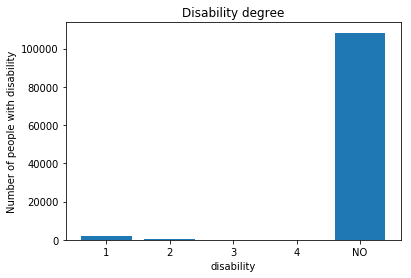

In [14]:
#(No mean with no disability and 1 is with one disability and so on ) 
# Create bars and choose color
plt.bar(['NO',1,2,3,4],df['Handcap'].value_counts()) 
 
# Add title and axis names
plt.title('Disability degree')
plt.xlabel('disability')
plt.ylabel('Number of people with disability');

> we can see that dataset provided by udacity isn't simillar that in the kaggle link , like Handcap which have 5values 
with lables NO disability , 1 disability and so on 


### Data Cleaning (incorrect Datatype)

In [15]:
df['PatientId'] = df['PatientId'].astype(int)
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] =pd.to_datetime(df['AppointmentDay'])
                                

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB



### Data Cleaning (incorrect value of age)

In [17]:
df.drop( df[df['Age']<0].index , inplace= True)


### Data Cleaning ( scheduled dates were after appointment dates)

In [18]:
df.drop( df[df['AppointmentDay'] < df['ScheduledDay']].index , inplace= True)

> make sure that code worked

In [19]:
len (df[df['AppointmentDay'] < df['ScheduledDay']])


0

## checking on data 

In [20]:
df.iloc[: , 2:].describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000
mean,38.502564,0.092706,0.208897,0.074723,0.025320,0.020025,0.493086
std,22.925421,0.290021,0.406523,0.262946,0.157096,0.154072,0.499956
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [21]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
5,95985133231274,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,733688164476661,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3449833394123,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
9,78124564369297,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No
10,734536231958495,5630213,F,2016-04-27 14:58:11,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,No


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71959 entries, 5 to 110526
Data columns (total 14 columns):
PatientId         71959 non-null int64
AppointmentID     71959 non-null int64
Gender            71959 non-null object
ScheduledDay      71959 non-null datetime64[ns]
AppointmentDay    71959 non-null datetime64[ns]
Age               71959 non-null int64
Neighbourhood     71959 non-null object
Scholarship       71959 non-null int64
Hipertension      71959 non-null int64
Diabetes          71959 non-null int64
Alcoholism        71959 non-null int64
Handcap           71959 non-null int64
SMS_received      71959 non-null int64
No-show           71959 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 8.2+ MB


> our data is now clean and ready to work on in next step we would save it 


In [23]:
df.to_csv('df_cleaned.csv', index=False)


## LOAD DATA
> this code for loadding data insted of doing same process again 

In [24]:
df = pd.read_csv('df_cleaned.csv')
#rechanging datatype because of saving save it as object
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] =pd.to_datetime(df['AppointmentDay'])
                  

<a id='eda'></a>
## Exploratory Data Analysis




>### Common area for questions  that have some calculation to understand data more . 

In [25]:
df.nunique()

PatientId         45840
AppointmentID     71959
Gender                2
ScheduledDay      68666
AppointmentDay       27
Age                 102
Neighbourhood        80
Scholarship           2
Hipertension          2
Diabetes              2
Alcoholism            2
Handcap               5
SMS_received          2
No-show               2
dtype: int64

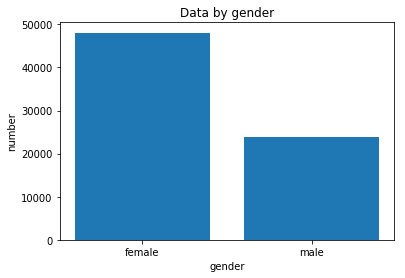

In [26]:
plt.bar(['female','male'], df['Gender'].value_counts()) 
plt.title('Data by gender')
plt.xlabel('gender')
plt.ylabel('number');


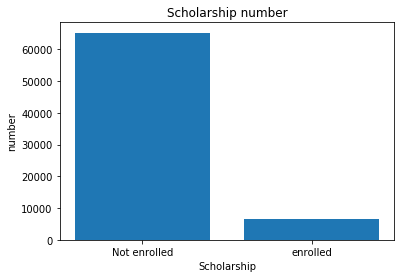

In [27]:
plt.bar(['Not enrolled','enrolled'], df['Scholarship'].value_counts()) 
plt.title('Scholarship number')
plt.xlabel('Scholarship')
plt.ylabel('number');

>Scholarship 0 indicate that they are not enrolled 

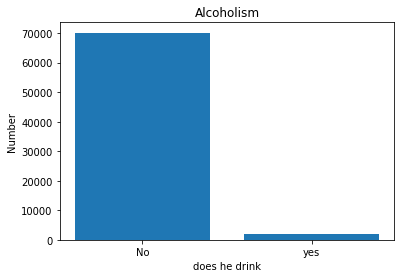

In [28]:
plt.bar(['No','yes'], df['Alcoholism'].value_counts()) 
plt.title('Alcoholism')
plt.xlabel('does he drink')
plt.ylabel('Number');

In [29]:
df.groupby( "No-show").Age.mean()

No-show
No     39.965706
Yes    34.835299
Name: Age, dtype: float64

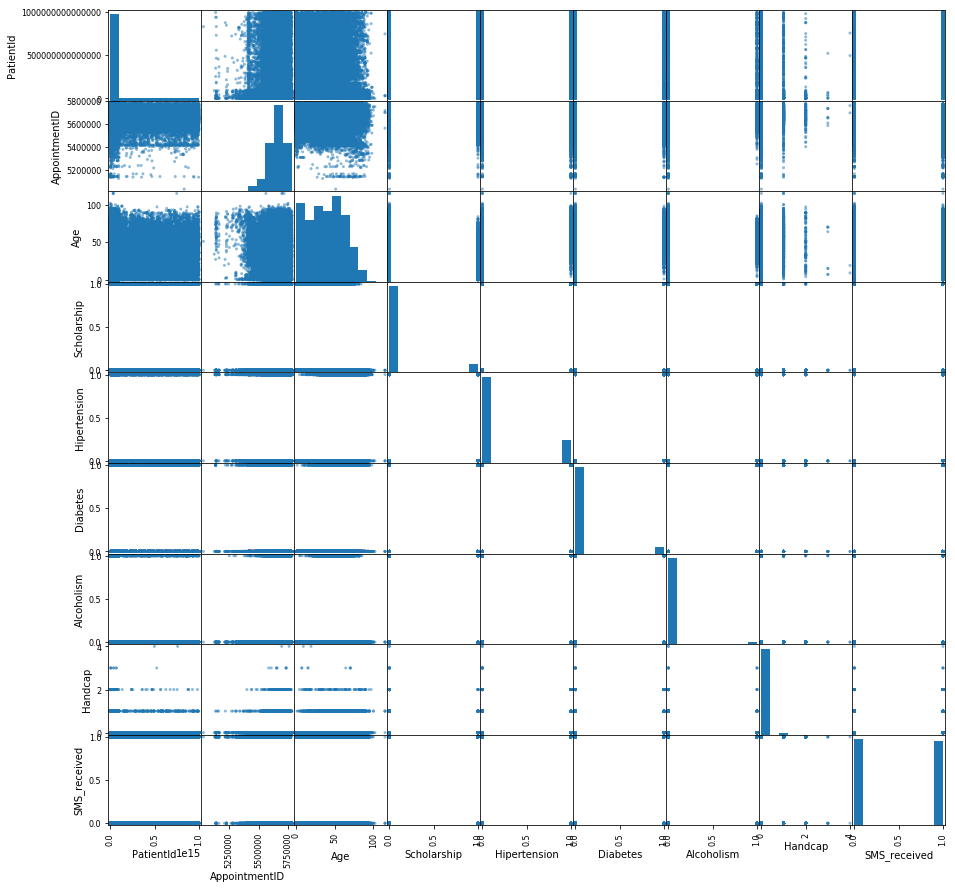

In [30]:
pd.plotting.scatter_matrix(df, figsize = (15,15)); 

> I Think no valuable information form this graph no correlation 

In [31]:
#make new separate data upon who attended and who was absent 
absent = df[df['No-show']=='Yes']
attended = df[df['No-show']=='No']

>splitting data to  absent and attended

In [32]:
df.groupby("No-show").Diabetes.value_counts()

No-show  Diabetes
No       0           47402
         1            4035
Yes      0           19180
         1            1342
Name: Diabetes, dtype: int64

In [33]:
len(attended)

51437

### Research Question 1 (Who care most about his health and is there relation between health awareness  and attendance ...? )

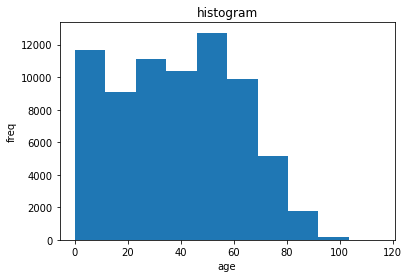

In [34]:
plt.hist(df['Age']) 
plt.title('histogram')
plt.xlabel('age')
plt.ylabel('freq');

> we can see that people with age between 40 to 60 also between 0 to 10 care more than other 
regardless if he attended or not , but we focous now in most percentage in our data .

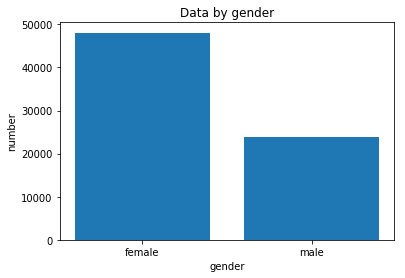

In [35]:
plt.bar(['female','male'], df['Gender'].value_counts()) 
plt.title('Data by gender')
plt.xlabel('gender')
plt.ylabel('number');


In [36]:
gend = df['Gender'].value_counts()

#perecntage of female to male is 
gend[0] / gend[1]

2.0122231989618653

> we can see that females care more about their health  
regardless if he attended or not , but we focous now in most percentage in our data .

### now let's see same but  for who attended 

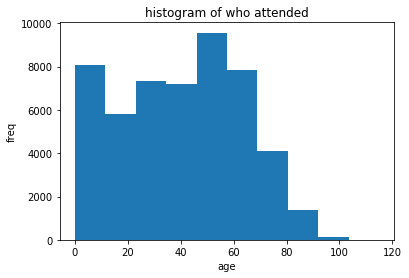

In [37]:
plt.hist(attended['Age']) 
plt.title('histogram of who attended')
plt.xlabel('age')
plt.ylabel('freq');

> we can see now that people with age between 40 to 60 also between 0 to 10 care more than other and that frequency of ages 
between 40 to 60 had been increased 

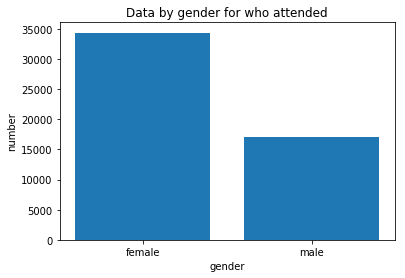

In [38]:
plt.bar(['female','male'], attended['Gender'].value_counts()) 
plt.title('Data by gender for who attended')
plt.xlabel('gender')
plt.ylabel('number');


In [39]:
gend = attended['Gender'].value_counts()

#perecntage of female to male is 
gend[0] / gend[1]

2.0184261487001938

> we can see that perecntage of female to male regardless to attendess and after considering who attended increased from2.012 to 2.018 that mean female intend more than males . 


>we can have concolusion that who care most with his health who has high probability to attend as we see in high frequency 
values for age between 40 to 60 and also as perecntage of female to male . 

In [40]:
absent.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,2.052200e+04,2.052200e+04,20522.000000,20522.000000,20522.000000,20522.000000,20522.000000,20522.000000,20522.000000
mean,1.466022e+14,5.647267e+06,34.835299,0.113683,0.172303,0.065393,0.030260,0.018273,0.476757
std,2.546720e+14,7.437696e+04,21.954582,0.317433,0.377653,0.247224,0.171307,0.149744,0.499472
min,5.628261e+06,5.122866e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.155486e+12,5.607590e+06,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.143032e+13,5.652835e+06,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.464659e+13,5.697974e+06,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.996585e+14,5.784663e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [41]:
attended.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,5.143700e+04,5.143700e+04,51437.000000,51437.000000,51437.000000,51437.000000,51437.000000,51437.000000,51437.000000
mean,1.447253e+14,5.658144e+06,39.965706,0.084336,0.223497,0.078445,0.023349,0.020724,0.499601
std,2.531249e+14,7.463410e+04,23.140047,0.277894,0.416592,0.268874,0.151011,0.155761,0.500005
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.951397e+12,5.621725e+06,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.964214e+13,5.664953e+06,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.337915e+13,5.710337e+06,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999320e+14,5.784985e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> ages in the range of 39 is highly probability to attend 
in the next line we will see how much is that correct 

In [42]:
#cheching assumption of age >= 39 have high probability to attend 
pred = df[df['Age']>= 39] 

In [43]:
pred_val = pred['No-show'].value_counts()

In [44]:
accuracy = pred_val[0] / (pred_val[0]+ pred_val[1])
print('accuracy  is :',accuracy*100,'%')

accuracy  is : 75.9732544967 %


> that may seem good , but could we even have more good result  ..?

In [45]:
total_handcap = df['Handcap'].value_counts()

In [46]:
attend_handcap = attended['Handcap'].value_counts()

In [47]:
print('for people with no disability percentage of attendence is', 100*(attend_handcap[0]/total_handcap[0]) ,'%')
print('for people with one disability percentage of attendence is', 100*(attend_handcap[1]/total_handcap[1]) ,'%')
print('for people with two disability percentage of attendence is', 100*(attend_handcap[2]/total_handcap[2]) ,'%')
print('for people with 3 disability percentage of attendence is', 100*(attend_handcap[3]/total_handcap[3]) ,'%')
print('for people with 4 disability percentage of attendence is', 100*(attend_handcap[4]/total_handcap[4]) ,'%')

for people with no disability percentage of attendence is 71.426145049 %
for people with one disability percentage of attendence is 74.9367088608 %
for people with two disability percentage of attendence is 69.6428571429 %
for people with 3 disability percentage of attendence is 75.0 %
for people with 4 disability percentage of attendence is 50.0 %


### Answer of question : 

1.	we can see that people with age between 40 to 60 also between 0 to 10 care more than others regardless if he attended or not , but we focus now in most percentage in our data .
2.	we can see that females care more about their health
regardless if he attended or not.
3.	For people who attended  with age between 40 to 60 also between 0 to 10 care more than other and that frequency of ages between 40 to 60 had been increased . 
4.	Percentage of female to male regardless to attendance  and after considering who attended increased from2.012 to 2.018 that mean female intend more than males .
5.	we can have conclusion that who care most with his health who has high probability to attend as we see in high frequency values for age between 40 to 60 and also as percentage of female to male .
6.	Ages in the range of 39 is highly probability to attend with percentage of 75.9 %.

7.	for people with no disability percentage of attendance is 71.426145049 %
8.	for people with one disability percentage of attendance is 74.9367088608 %
9.	for people with two disability percentage of attendance is 69.6428571429 %
10.	for people with 3 disability percentage of attendance is 75.0 %
11.	for people with 4 disability percentage of attendance is 50.0 %



### Research Question 2  (Is  appoitment time affect and is their is relation between it and schedule time  ...? )

>we would try to draw AppointmentDay for both who attendd and who not . 

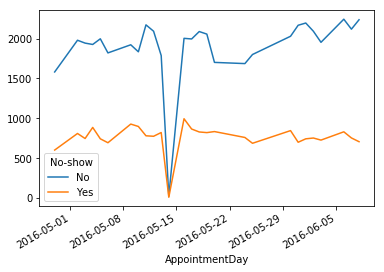

In [48]:
df.groupby(['AppointmentDay','No-show']).size().unstack().plot() ;

> after using line graph we can  see that there is no decision we can take upon day of appointment .
Also we can see that number of people who attended is much higher than number of who not . interval between 10-5-2016 and 15-5-2016 has approximately  zero value .
we could think is another way of the period between schedule time and the appointment . let's see that . 

In [49]:
#calculate differance in days 
#value would be int 
df["appoint_sche"] =( df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [50]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,appoint_sche
0,95985133231274,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,1
1,733688164476661,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1
2,3449833394123,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1
3,78124564369297,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,1
4,734536231958495,5630213,F,2016-04-27 14:58:11,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,No,1
5,7542951368435,5620163,M,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,2
6,566654781423437,5634718,F,2016-04-28 11:33:51,2016-04-29,22,NOVA PALESTINA,1,0,0,0,0,0,No,0
7,911394617215919,5636249,M,2016-04-28 14:52:07,2016-04-29,28,NOVA PALESTINA,0,0,0,0,0,0,No,0
8,99884723334928,5633951,F,2016-04-28 10:06:24,2016-04-29,54,NOVA PALESTINA,0,0,0,0,0,0,No,0
9,99948393975,5620206,F,2016-04-26 08:47:27,2016-04-29,15,NOVA PALESTINA,0,0,0,0,0,1,No,2


In [51]:
# assuming that paient with appoint_sche >1 won't come 
late = df[df['appoint_sche']>30 ]

In [52]:
#cheking that assumption
result = late['No-show'].value_counts()

In [53]:
result

No     6501
Yes    3205
Name: No-show, dtype: int64

In [54]:
acc = result[1] / (result[1]+result[0])
print("accuracy is ",acc*100,"%")

accuracy is  33.0208118689 %


> now we can see that we have a good result that the person with waiting time of 30 day 
have high probability to not to come . 

In [55]:
comine = df[df['appoint_sche']<30  ] 

In [56]:
combined_f = comine[comine['Age']>= 39  ]  

In [57]:
pred_val = combined_f['No-show'].value_counts()
accuracy = pred_val[0] / (pred_val[0]+ pred_val[1])
print('accuracy  is :',accuracy*100,'%')

accuracy  is : 76.4637456378 %


>as we can see that halped to increase accuracy after combining both tech 

<a id='conclusions'></a>
## Conclusions

1.	we can see that people with age between 40 to 60 also between 0 to 10 care more than others regardless if they attended or not , but we focus now in most percentage in our data .
2.	we can see that females care more about their health regardless if they attended or not.
3.	For people who (**attended**)  with age between 40 to 60 also between 0 to 10 care more than other and that frequency of ages between 40 to 60 had been **increased** . 
4.	Percentage of (**female to male**) regardless to attendance  and after considering who attended increased from **2.012** to   **2.018** that mean female attended more than males .
5.	we can have conclusion that who care most with his health who has high probability to attend as we see in high frequency values for age between 40 to 60 and also as percentage of female to male .
6.	Ages in the range of 39 is highly probability to attend with percentage of 75.9 %.

7.	for people with no disability percentage of attendance is 71.426145049 % 

> A. for people with one disability percentage of attendance is 74.9367088608 % .
> B. for people with two disability percentage of attendance is 69.6428571429 % .
> C. for people with 3 disability percentage of attendance is 75.0 %
> D. for people with 4 disability percentage of attendance is 50.0 %

8.	Appointment day dosen't affect so much  for example this datas 16-5-2016 and 9-5-2016  has low percentage of attendance  both are monday so we can say that if the appointment is in monday the probability of patients to attend is low , but that's isn't totally correct as there are other mondays with high attendance . using line graph we can  see that there is no decision we can take upon day of appointment . we could think is another way of the period between schedule time and the appointment  
9.	person with waiting time of 30 day have high probability to not to come of 33%.
10.	After adding waiting time with age that helped to increase accuracy after combining both tech to 76.46% .










### Limitation 
1.	Our data isn’t similar to kaggle the data on kaggle is high version than what we work on For example handcap have 5 values (0 mean with no disability and 1 is with one disability and so on ) in previous version it had only  2 values true and false .

2.	AppointmentDay columns has the same time which is 00:00:00Z rather than ScheduledDay, but i don't think that would case problem.

3.	scheduled dates were after appointment dates and that’s not logically  true . 
4. Dataset was collected only in brazil  .
5. Dataset hav't a good description for it . 


5. So this applies only to the analyzed dataset. Statistical analysis was not carried out to verify whether the sample's representativeness in relation to the general population.



In [58]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0